In [1]:
import numpy as np
import cmath
import scipy.integrate as spint
import matplotlib.pyplot as plt

In [12]:
def mthm_vpi(v):
    coeff = FYFG *(3/2)*n*(1-e**2)**2
    term1 = (np.cos(v - x0)/(e*(-1+e**2)*np.sqrt(1-e**2)))
    term2 = (3/4)*J2*(Rp/a)**2* n/(1-e**2)**2 * (2 - (5/2)*(np.sin(i)**2))
    period = 11.86 * (a / 5.2)**(3/2) * (M_sol)**(1/2)
    term3 = 2*np.pi / period
    return coeff*term1 + term2 - term3

def mthm_e(e):
    coeff = FYFG *(3/2)*n*(1-e**2)**2
    term1 = np.sin(v-x0)/((-1+e**2)*np.sqrt(1-e**2))
    return coeff*term1

def yark_acc(x, y, z):    
    L = L_sol*0.000235 # solar luminosity in au^2 M_sol/yr^3

    c = 63197.8 # speed of light in au/yr
    r = np.sqrt(x**2 + y**2 + z**2)
    A = (R**2 * L_sol)/(4*mast*c)

    ax = (A/r**3) * x
    ay = (A/r**3) * (0.25*x + y)
    az = (A/r**3) * z
    return mast*np.sqrt(ax**2 + ay**2 + az**2), np.arctan2(ay,ax)


es = np.linspace(0,1,100)
v_ = np.linspace(0,2*np.pi,100)

rhill = 0.35
G = 4*np.pi**2
Mj = 9.55e-4
J2 = 1.47e-2
Rp = 4.78e-4
a = 0.07
i = 0
L_sol = 1
M_sol = 1
rkm = 10          # moon radius in km
R = rkm*6.68e-9      # converts moon radius to AU
v_ast = (rkm**5)**3 * (4/3) * np.pi # volume of moon in cm^3
m_ast = v_ast * (3/1000)              # mass of moon in kg if density ~ 3 g/cm^3
mast = m_ast / 1.989e30              # converts moon mass to M_sol
B = 0
FY, x0 = yark_acc(7.5,0,0)
n = np.sqrt(G*Mj / a**3)
FG = (G*Mj*mast)/(a**2)
FYFG = FY/FG

edata = np.zeros((len(es),len(v_)))
vdata = np.zeros((len(es),len(v_)))

for et in range(len(es)):
    e = es[et]
    for it in range(len(v_)):
        v = v_[it]
        m = v_[it]

        evals = mthm_e(e)
        vvals = mthm_vpi(v)

        edata[et,it] = evals
        vdata[et,it] = vvals

/home/mdodici/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mdodici/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/mdodici/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/mdodici/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/home/mdodici/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


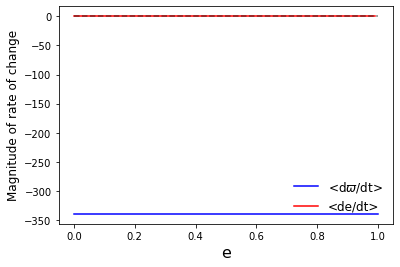

Constants:
FY / FG = 0.00001
n = 10.5 AU / yr
Theta_0 = 0.2
i = 0.0
B = 0.0


In [13]:
plt.plot(es,(vdata[40]),'b')
plt.plot(es,(edata[:,0]),'r')
plt.plot(es,np.zeros_like(es),'k',ls='--',alpha=0.5)
#plt.fill_between(es, (idata) - ierrs, (idata) + ierrs, facecolor='b', alpha=0.3,zorder=0)
#plt.fill_between(es, edata - eerrs, edata + eerrs, facecolor='r', alpha=0.3,zorder=0)
plt.legend(labels=[r"<d$\varpi$/dt>","<de/dt>"], fontsize=12, frameon=False,loc='lower right')
#plt.ylim(-1e-7,1.2e-6)
plt.xlabel("e", fontsize=16)
plt.ylabel("Rate of change", fontsize=12)
#plt.text(0,6e-7,r"i = %2.f$^\circ$" %(i*180/np.pi), fontsize=16)
plt.show()
print("Constants:")
print(r"FY / FG = %.5f" %FYFG)
print("n = %1.1f AU / yr" %n)
print("Theta_0 = %1.1f" %x0)
print("i = %1.1f" %i)
print("B = %1.1f" %B)

In [9]:
varpi_dot = (3/2)*J2*(Rp/a)**2* n
ef = (3/2) * n/varpi_dot * FYFG * np.cos(B)
print(ef)

49.144938410539226


In [14]:
import matplotlib.colors as colors
# Example of making your own norm.  Also see matplotlib.colors.
# From Joe Kington: This one gives two different linear ramps:

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
class MidpointNorm(colors.Normalize):
    def __init__(self, vmin=-.004, vmax=.004, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
#####

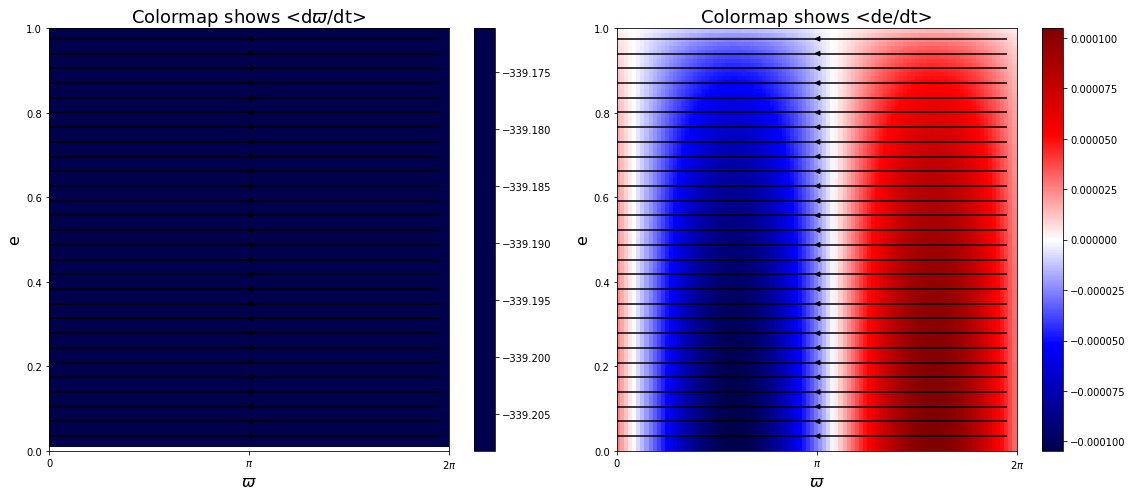

In [15]:
fig, ax = plt.subplots(1,2,figsize=(16,7))

speed = np.sqrt(vdata**2 + edata**2)
for i in range(2):
    ax[i].set_xlabel(r"$\varpi$",fontsize=16)
    ax[i].set_ylabel("e",fontsize=16)
    ax[i].set_xticks([0,np.pi,2*np.pi])
    ax[i].set_xticklabels([0,r"$\pi$",r"2$\pi$"])
    ax[i].set_xlim(0,2*np.pi)
    ax[i].streamplot(v_,es,vdata,edata,color='k')
    #ax[i].hlines(ef,0,2*np.pi,color='k',ls="--")
ax[0].set_title(r"Colormap shows <d$\varpi$/dt>",fontsize=18)
ax[1].set_title(r"Colormap shows <de/dt>",fontsize=18)
ax0 = ax[0].pcolor(v_,es,vdata,cmap='seismic',norm=MidpointNormalize(midpoint=0))
ax1 = ax[1].pcolor(v_,es,edata,cmap='seismic',norm=MidpointNormalize(midpoint=0))

fig.colorbar(ax0,ax=ax[0])
fig.colorbar(ax1,ax=ax[1])
fig.show()
fig.tight_layout()